In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

In [94]:
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


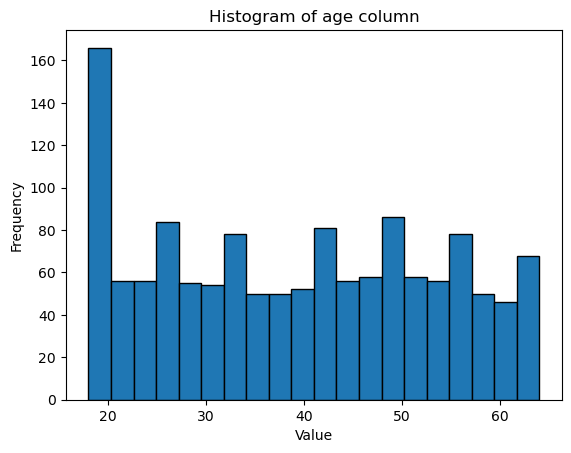

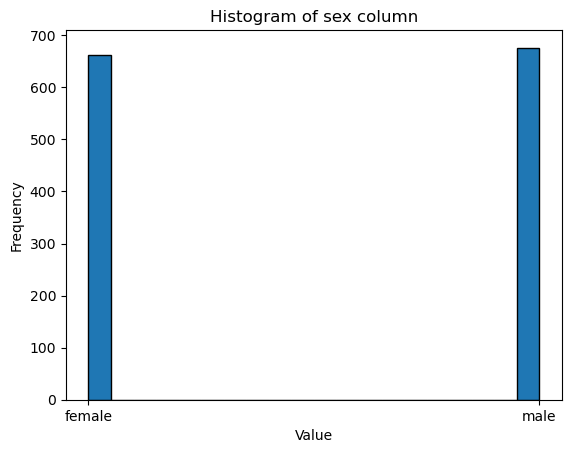

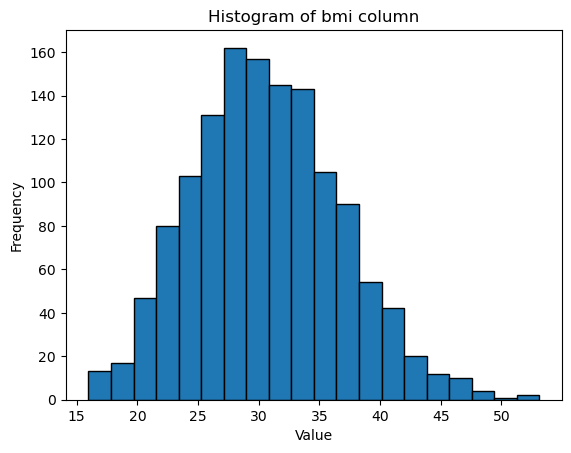

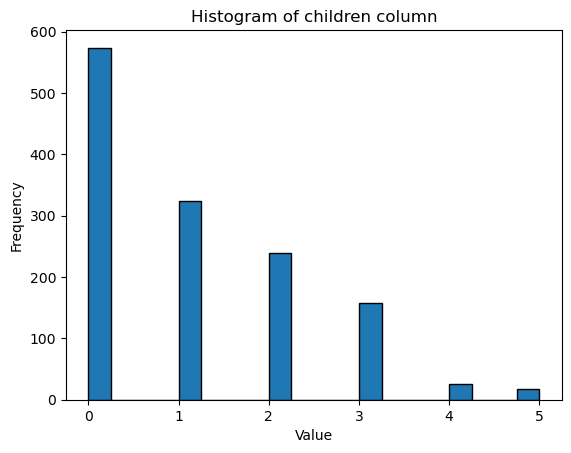

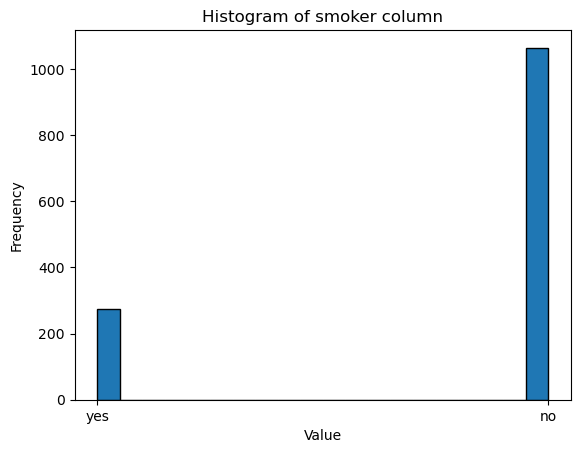

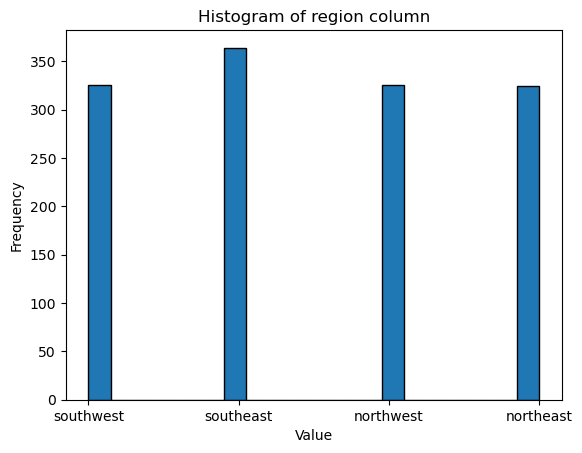

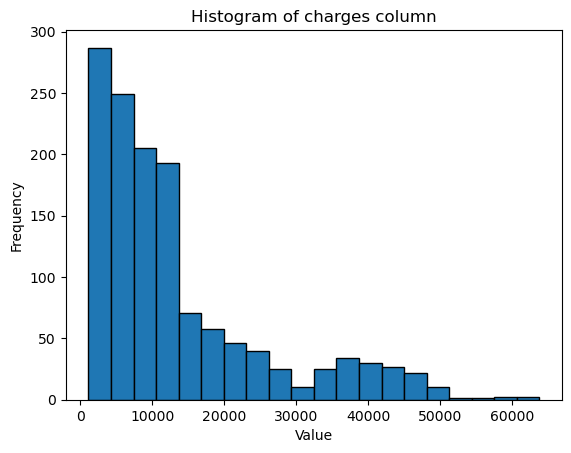

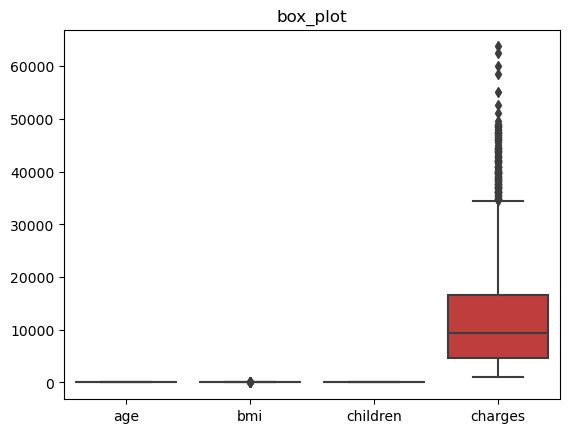

In [95]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.info()
plt.hist(df['age'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of age column')
plt.show()

plt.hist(df['sex'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of sex column')
plt.show()

plt.hist(df['bmi'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of bmi column')
plt.show()

plt.hist(df['children'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of children column')
plt.show()


plt.hist(df['smoker'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of smoker column')
plt.show()


plt.hist(df['region'], edgecolor = 'black', bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of region column')
plt.show()


plt.hist(df['charges'], edgecolor = 'black',bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of charges column')
plt.show()


sns.boxplot(df)
plt.title("box_plot")
plt.show()



In [96]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [97]:
print(df['region'].unique())
print(df['sex'].unique())
print(df['smoker'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']
['yes' 'no']


In [98]:
def detect_outliers(data):
    outliers=[]
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i,v in data.items():
        z_score= (v - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append((i,v))
    return outliers

In [99]:
# removing outliers

outlier_pt=detect_outliers(df['charges'])
outliers_indices = [index for index, _ in outlier_pt]
outliers_values = [value for _, value in outlier_pt]

print("charges outliers",outliers_values)
df = df.drop(outliers_indices)

charges outliers [51194.55914, 63770.42801, 58571.07448, 55135.40209, 52590.82939, 60021.39897, 62592.87309]


In [100]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['region', 'sex', 'smoker']) 
print(one_hot_encoded_data)

      age     bmi  children      charges  region_northeast  region_northwest  \
0      19  27.900         0  16884.92400                 0                 0   
1      18  33.770         1   1725.55230                 0                 0   
2      28  33.000         3   4449.46200                 0                 0   
3      33  22.705         0  21984.47061                 0                 1   
4      32  28.880         0   3866.85520                 0                 1   
...   ...     ...       ...          ...               ...               ...   
1333   50  30.970         3  10600.54830                 0                 1   
1334   18  31.920         0   2205.98080                 1                 0   
1335   18  36.850         0   1629.83350                 0                 0   
1336   21  25.800         0   2007.94500                 0                 0   
1337   61  29.070         0  29141.36030                 0                 1   

      region_southeast  region_southwes

In [101]:
def z_score_normalizarion(series):
    for column in series.columns: 
        series[column] = (series[column] - series[column].mean()) / series[column].std()  
    return series

In [102]:
one_hot_encoded_data = z_score_normalizarion(one_hot_encoded_data)

In [103]:
print(one_hot_encoded_data)

           age       bmi  children   charges  region_northeast  \
0    -1.435876 -0.448861 -0.909529  0.328920         -0.565858   
1    -1.507010  0.515207 -0.080362 -0.966824         -0.565858   
2    -0.795672  0.388745  1.577971 -0.733999         -0.565858   
3    -0.440003 -1.302069 -0.909529  0.764802         -0.565858   
4    -0.511137 -0.287909 -0.909529 -0.783797         -0.565858   
...        ...       ...       ...       ...               ...   
1333  0.769271  0.055345  1.577971 -0.208236         -0.565858   
1334 -1.507010  0.211370 -0.909529 -0.925760          1.765899   
1335 -1.507010  1.021055 -0.909529 -0.975006         -0.565858   
1336 -1.293608 -0.793758 -0.909529 -0.942687         -0.565858   
1337  1.551742 -0.256704 -0.909529  1.376535         -0.565858   

      region_northwest  region_southeast  region_southwest  sex_female  \
0            -0.565858         -0.610983          1.765899    1.009436   
1            -0.565858          1.635477         -0.565858 

In [104]:
print(one_hot_encoded_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1331 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1331 non-null   float64
 1   bmi               1331 non-null   float64
 2   children          1331 non-null   float64
 3   charges           1331 non-null   float64
 4   region_northeast  1331 non-null   float64
 5   region_northwest  1331 non-null   float64
 6   region_southeast  1331 non-null   float64
 7   region_southwest  1331 non-null   float64
 8   sex_female        1331 non-null   float64
 9   sex_male          1331 non-null   float64
 10  smoker_no         1331 non-null   float64
 11  smoker_yes        1331 non-null   float64
dtypes: float64(12)
memory usage: 135.2 KB
None


In [105]:
X = one_hot_encoded_data.loc[:, one_hot_encoded_data.columns != 'charges']
y = one_hot_encoded_data['charges']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)

In [107]:
model = LinearRegression()


model.fit(X_train, y_train)


y_predict = model.predict(X_test)


r2 = r2_score(y_test, y_predict)
print(r2)


0.7646372396251109


In [108]:
class linearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/ n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [109]:
model_two = linearRegression(lr=0.1)
model_two.fit(X_train, y_train)

y_predict_two = model_two.predict(X_test)

r2_two = r2_score(y_test, y_predict_two)
print(r2_two)


0.764637239625111
